<a href="https://www.kaggle.com/code/yeettothemax/customer-segmentation?scriptVersionId=139895767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#set color palette for plot throughout the notebook

sns.set_palette("rocket")

### ***Load Dataset***

In [3]:
data_path = '../input/customer'

train_df = pd.read_csv(data_path+'/Train.csv')
test_df = pd.read_csv(data_path+ '/Test.csv')

In [4]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### ***Exploratory Data Analysis and Data Preprocessing***

In [5]:
#check features types
train_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
#check for missing values 
train_df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

There are in fact many missing values

In [7]:
#check for duplicate samples 
train_df.duplicated().sum()
#no duplicates.

0

In [8]:
#forward fill of missing values
def forward_fill(df):
    df_filled = df.apply(lambda col: col.fillna(method='ffill') if col.isnull().any() else col, axis=0)
    return df_filled

train1  = forward_fill(train_df)

In [9]:
train1.isnull().sum()
#no missing values

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
#drop unwanted columns
#drop 'ID' and "Var1" column 
train=train1.drop(['ID','Var_1'],axis=1)
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


/tmp/ipykernel_20/3109644737.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # the layout of each xticks appear better


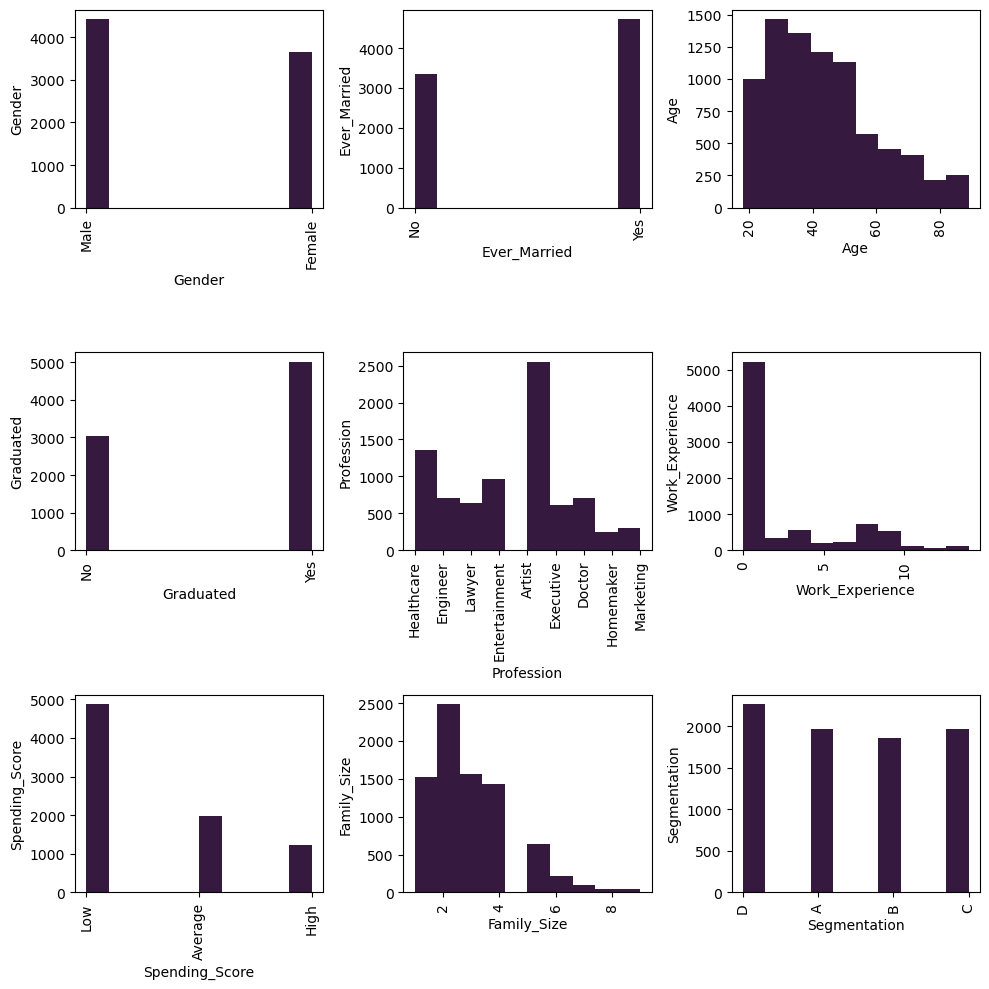

In [11]:

plt.subplots(nrows=3,ncols=3,figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.hist(train.iloc[:,i])
    plt.xlabel(train.columns[i])
    plt.ylabel(train.columns[i])
    plt.xticks(rotation=90)  #rotate x axis labels
    plt.tight_layout() # the layout of each xticks appear better


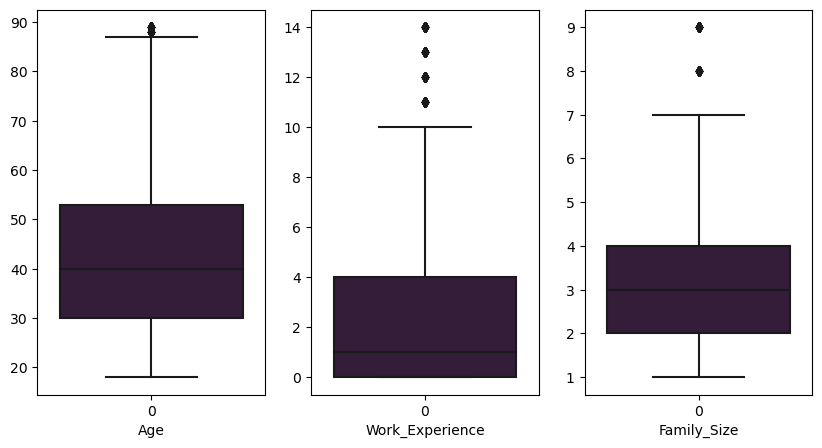

In [12]:
#box plot of neumerical features
plt.subplots(nrows=1,ncols=3,figsize = (10,5))
k=0
for i in range(train.shape[1]):
    #check for numerical feature
    if type(train.iloc[0,i]) == np.int64 or type(train.iloc[0,i]) == np.float64:
        plt.subplot(1,3,k+1)
        sns.boxplot(train.iloc[:,i])
        plt.xlabel(train.columns[i])
        k +=1 

### Heatmap 

In [13]:
#One Hot encoding of categorical values
data_encoded = pd.get_dummies(train) 

(25.5, -0.5)

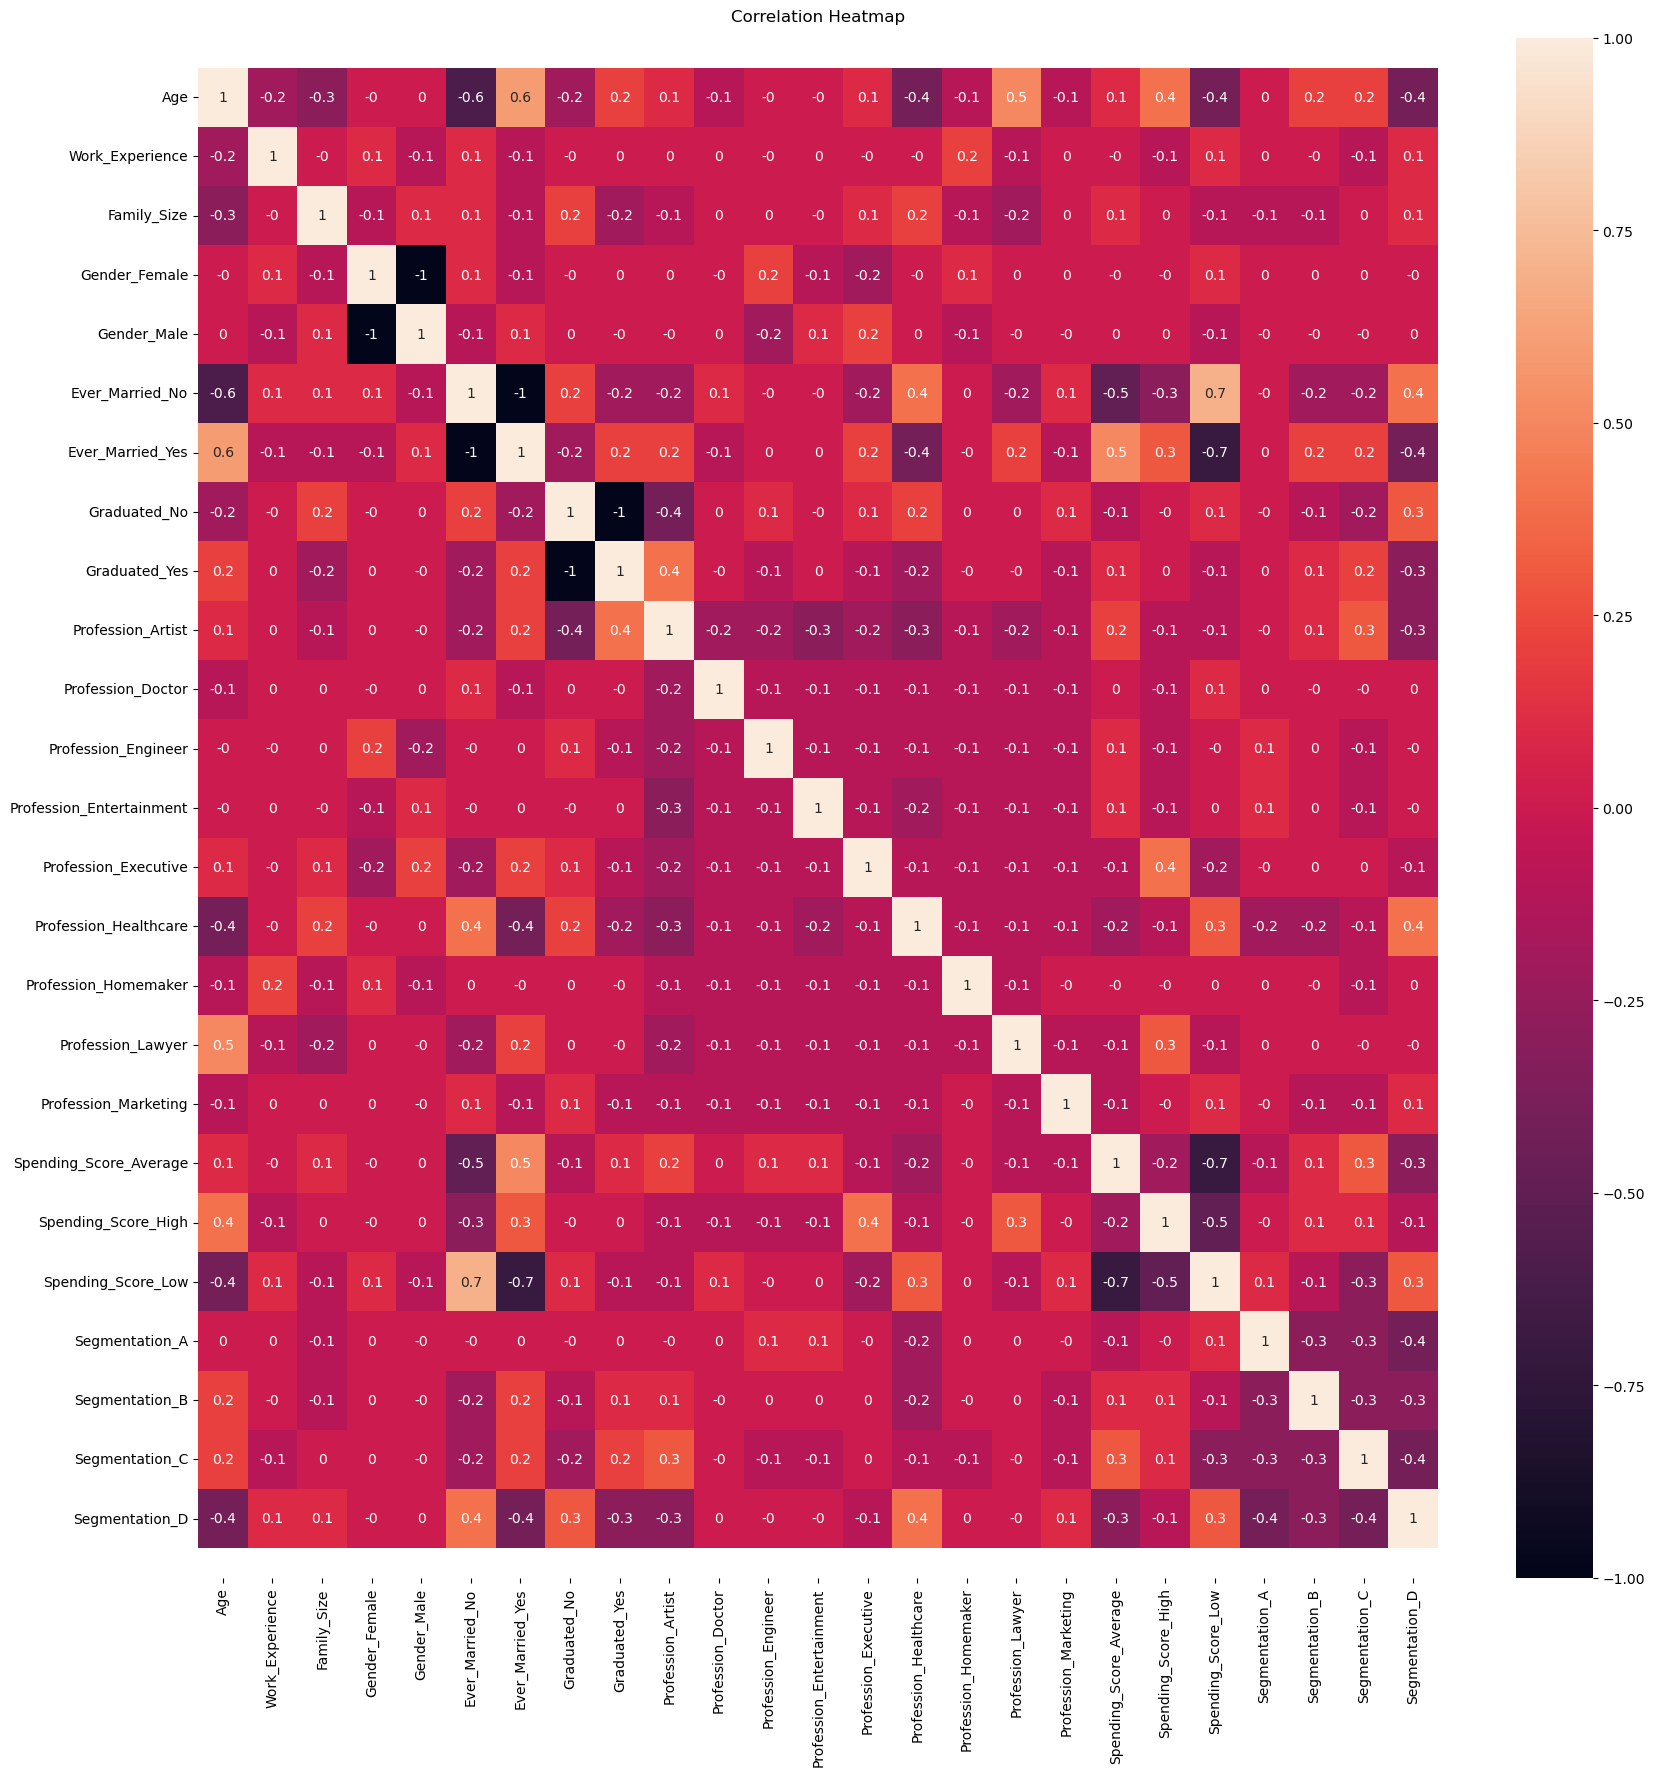

In [14]:
data_corr = data_encoded.corr() #correlation matrix
plt.figure(figsize=(20, 20)) #initialize figure
heatmap = sns.heatmap(data_corr.round(1), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#better display of heatmap
bottom, top = heatmap.get_ylim() 
heatmap.set_ylim(bottom + 0.5, top - 0.5)

In [15]:
data_corr['Segmentation_A'].sort_values(ascending=False)[1:10]

Profession_Entertainment    0.117090
Spending_Score_Low          0.097750
Profession_Engineer         0.091904
Profession_Lawyer           0.049820
Age                         0.049626
Profession_Doctor           0.033922
Work_Experience             0.031513
Profession_Homemaker        0.021462
Gender_Female               0.009627
Name: Segmentation_A, dtype: float64

In [16]:
data_corr['Segmentation_B'].sort_values(ascending=False)[1:10]

Ever_Married_Yes          0.168244
Age                       0.154935
Graduated_Yes             0.116410
Profession_Artist         0.112398
Spending_Score_Average    0.092726
Spending_Score_High       0.085547
Profession_Executive      0.049935
Profession_Engineer       0.029077
Profession_Lawyer         0.014786
Name: Segmentation_B, dtype: float64

In [17]:
data_corr['Segmentation_C'].sort_values(ascending=False)[1:10]

Spending_Score_Average    0.282550
Profession_Artist         0.274843
Ever_Married_Yes          0.241279
Graduated_Yes             0.232098
Age                       0.193101
Spending_Score_High       0.087161
Family_Size               0.046389
Profession_Executive      0.030974
Gender_Female             0.017690
Name: Segmentation_C, dtype: float64

Segmentation D seem to be possitively correlated with married artists who have an average spending score

In [18]:
data_corr['Segmentation_D'].sort_values(ascending=False)[1:10]

Profession_Healthcare    0.449191
Ever_Married_No          0.390291
Spending_Score_Low       0.339896
Graduated_No             0.334667
Family_Size              0.148055
Profession_Marketing     0.126903
Work_Experience          0.063501
Gender_Male              0.037299
Profession_Homemaker     0.032972
Name: Segmentation_D, dtype: float64

Segmentation D seems to be possitively correlated with unmarried individuals who belong in the healthcare sector that have a low spending score

### ***Model Fitting***

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [20]:
#one hot encode data
train_encoded = pd.get_dummies(train) 
#drop one hot encoded target variable
train_final  = train_encoded.drop(['Segmentation_A','Segmentation_B','Segmentation_C','Segmentation_D'],axis=1)
train_final

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,38,1.0,3.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
#label encode the target variable
label_encoder = LabelEncoder()

target_encoded = label_encoder.fit_transform(train['Segmentation'])
target_encoded

array([3, 0, 1, ..., 3, 1, 1])

In [22]:
#split for validation data
x_train, x_test, y_train, y_test = train_test_split(train_final,target_encoded,test_size=0.2,stratify = target_encoded,random_state=42)

### **Random Forest Classifier**

In [23]:
forest_model = RandomForestClassifier(random_state =42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [2,3,4,5,10]
}


grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5)

# Fit the grid search 
grid_search.fit(x_train, y_train)

#best model
print('The best model provided from the gridsearch is:', grid_search.best_estimator_)

# predict test labels
predictions = grid_search.predict(x_test)

# training accuracy
train_score = grid_search.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)

# accuracy of the  model
test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

The best model provided from the gridsearch is: RandomForestClassifier(max_depth=10, random_state=42)
Accuracy of model on train set: 0.6775643012085528
Accuracy of model on test set: 0.5421313506815365


              precision    recall  f1-score   support

           0       0.43      0.43      0.43       394
           1       0.46      0.33      0.38       372
           2       0.58      0.61      0.60       394
           3       0.63      0.76      0.69       454

    accuracy                           0.54      1614
   macro avg       0.53      0.53      0.52      1614
weighted avg       0.53      0.54      0.53      1614



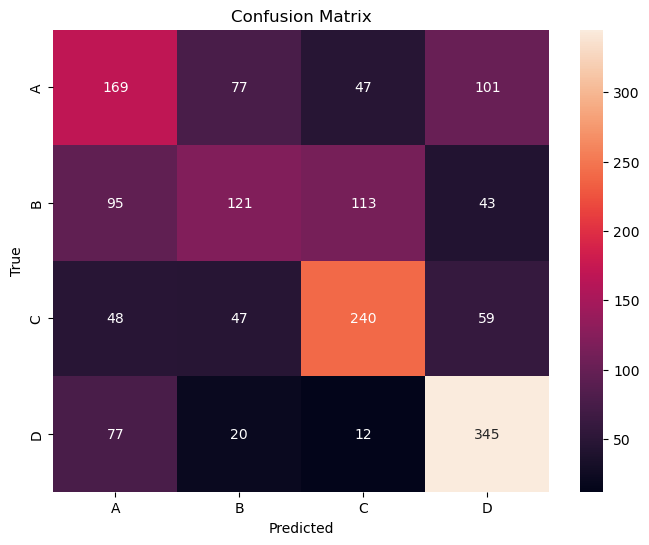

In [24]:
#classification report
print(classification_report(y_test,predictions))

#confusion matrix
cm = confusion_matrix(y_test, predictions)

class_labels = ['A','B','C','D']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Ada Boost**

In [25]:

# adaboost classifer
classifier = AdaBoostClassifier(estimator=forest_model,random_state=42)

# train model
classifier.fit(x_train, y_train)

# predict test labels
predictions = classifier.predict(x_test)

#train accuracy
train_score = classifier.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)

# accuracy of the  model
test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

Accuracy of model on train set: 0.9355438487759529
Accuracy of model on test set: 0.4721189591078067


              precision    recall  f1-score   support

           0       0.37      0.36      0.37       394
           1       0.35      0.32      0.33       372
           2       0.50      0.48      0.49       394
           3       0.61      0.68      0.64       454

    accuracy                           0.47      1614
   macro avg       0.46      0.46      0.46      1614
weighted avg       0.47      0.47      0.47      1614



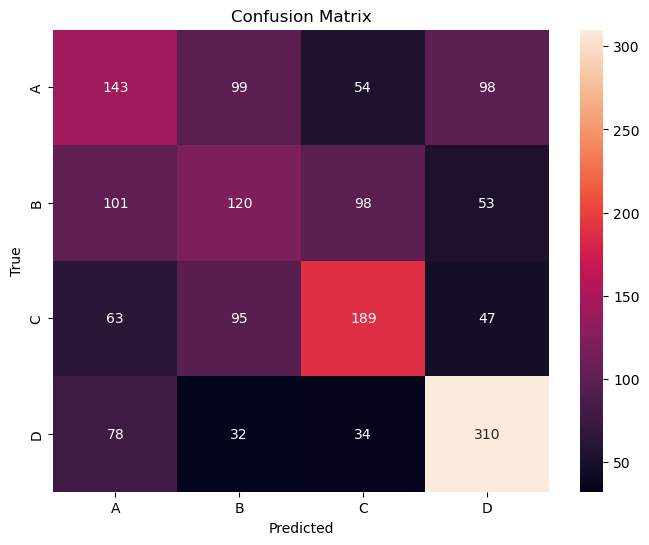

In [26]:
#classification report
print(classification_report(y_test,predictions))

#confusion matrix
cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **XGB Classifier**

In [27]:
# xgb classifier
model_xgb=XGBClassifier(learning_rate=0.1,random_state=42,max_depth=15,n_estimators=1000,objective="multi:softproba")
model_xgb.fit(x_train,y_train)

#predict test labels
predictions = model_xgb.predict(x_test)

#train accuracy
train_score = model_xgb.score(x_train, y_train)
print('Accuracy of model on train set:',train_score)

# accuracy of the  model
test_score = accuracy_score(y_test, predictions)
print('Accuracy of model on test set:',test_score)

Accuracy of model on train set: 0.9355438487759529
Accuracy of model on test set: 0.4721189591078067


              precision    recall  f1-score   support

           0       0.36      0.37      0.37       394
           1       0.35      0.32      0.33       372
           2       0.49      0.49      0.49       394
           3       0.63      0.67      0.65       454

    accuracy                           0.47      1614
   macro avg       0.46      0.46      0.46      1614
weighted avg       0.47      0.47      0.47      1614



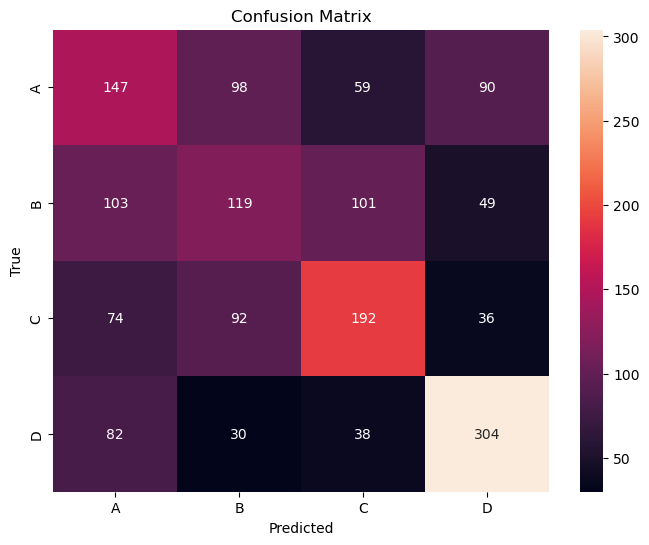

In [28]:
#classification report
print(classification_report(y_test,predictions))

#confusion matrix
cm = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The model that yielded the best results in terms of accuracy in the validation set is the Random forest classifier.

This notebook contains an elementary approach for the customer segmentation dataset. There are a lot of improvements to be made such as feature selection, model selection etc.